In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/Housing (1).csv')

# Display the first 5 rows
display(df.head())

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [115]:
# Explore the data
display(df.info())
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


None

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [116]:
# Check for missing values
display(df.isnull().sum())

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


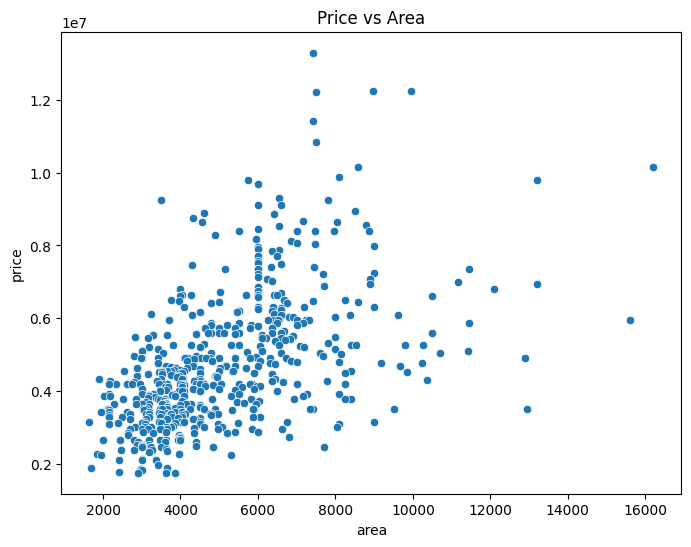

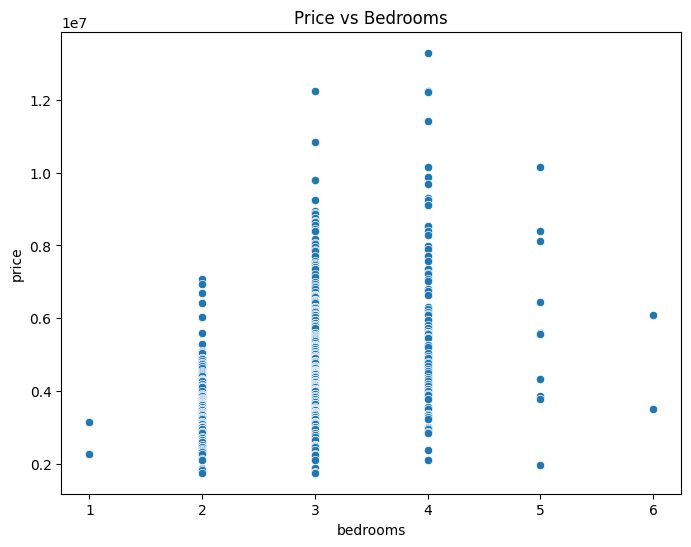

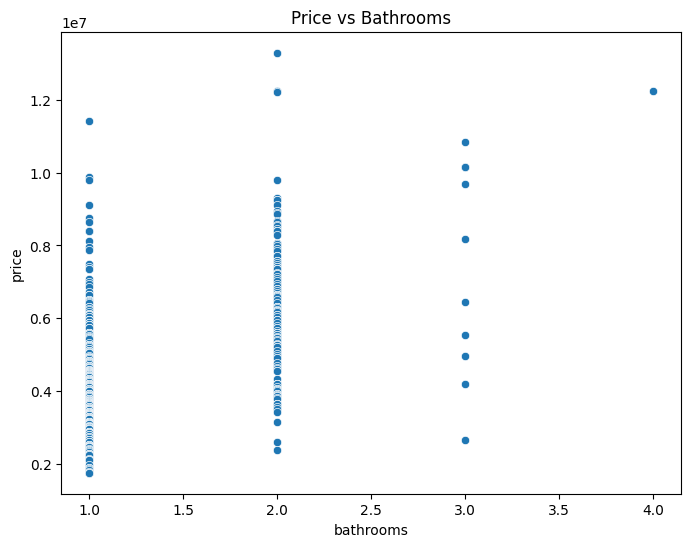

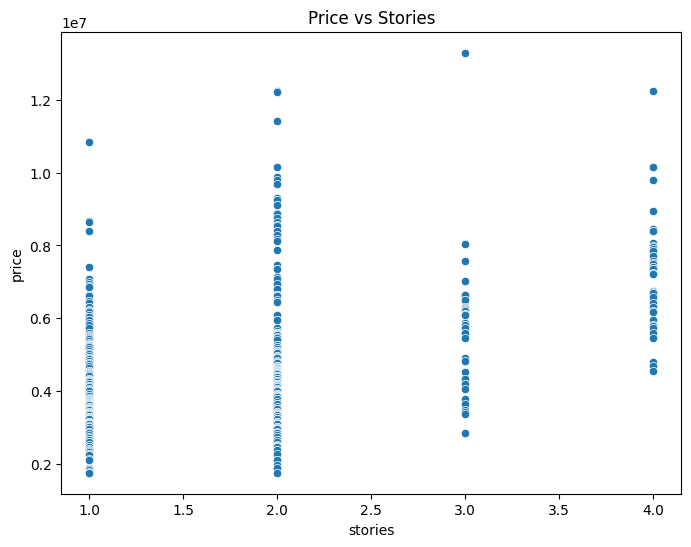

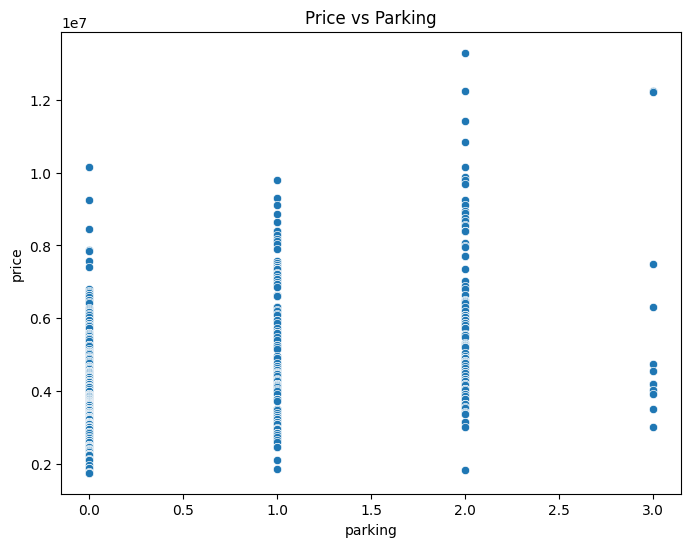

In [117]:
# Visualize distributions of numerical features
numerical_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=feature, y='price', data=df)
    plt.title(f'Price vs {feature.capitalize()}')
    plt.show()

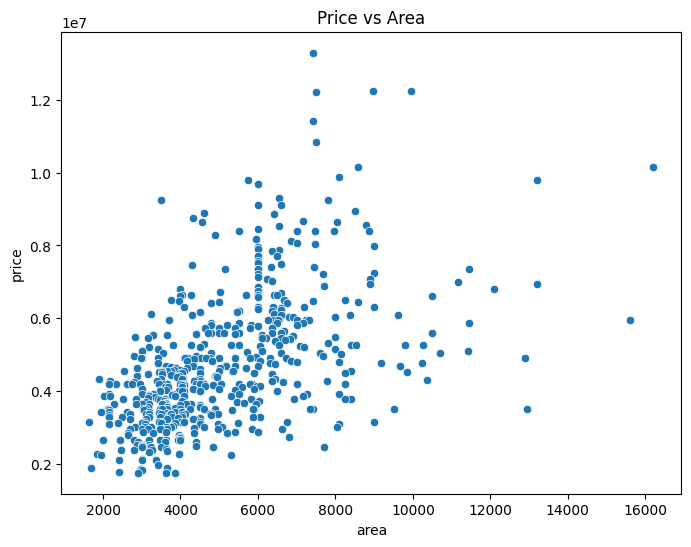

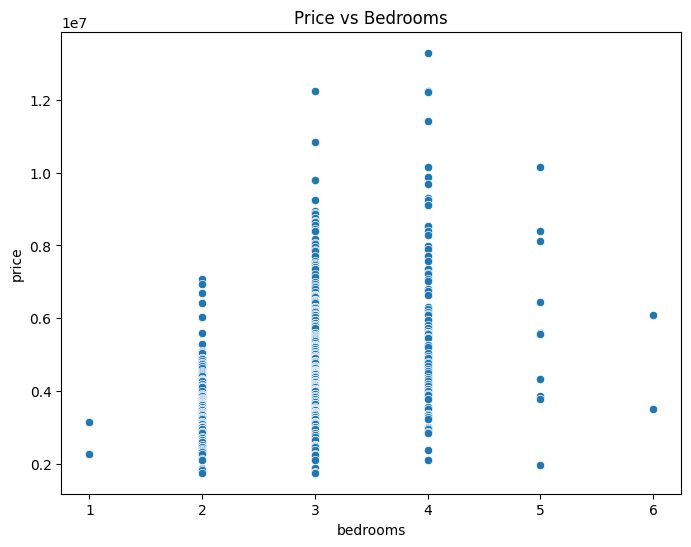

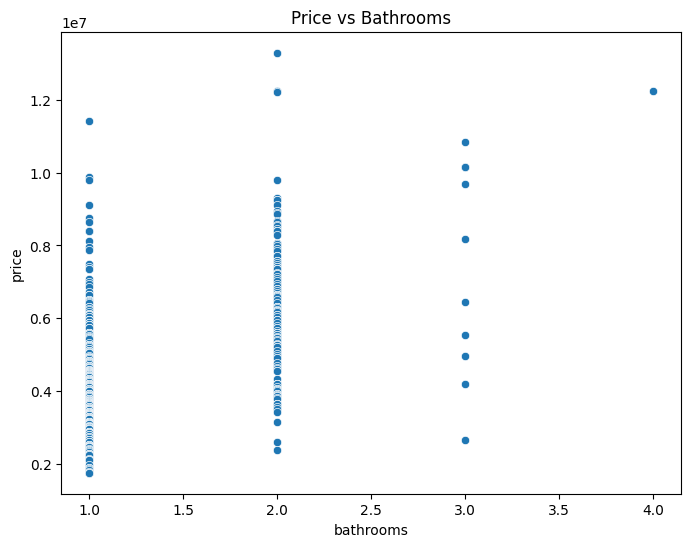

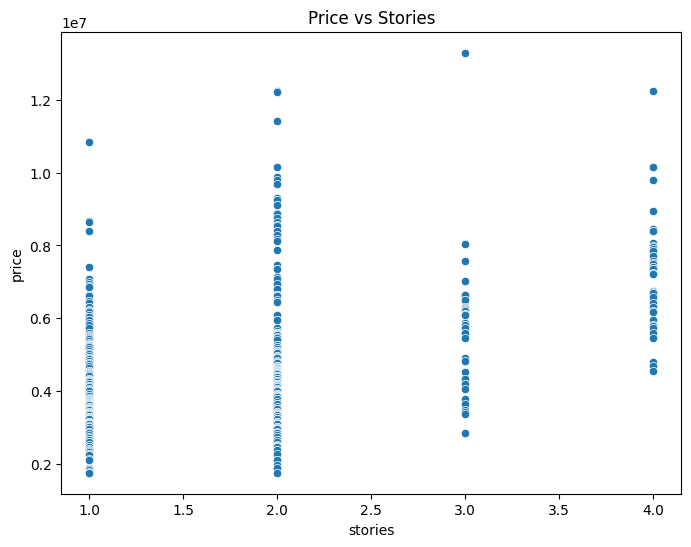

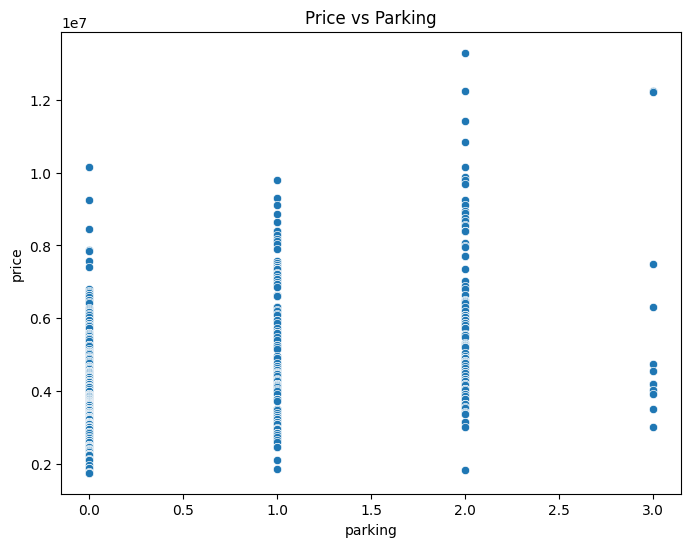

In [118]:
# Visualize relationships between numerical features and house price
numerical_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=feature, y='price', data=df)
    plt.title(f'Price vs {feature.capitalize()}')
    plt.show()

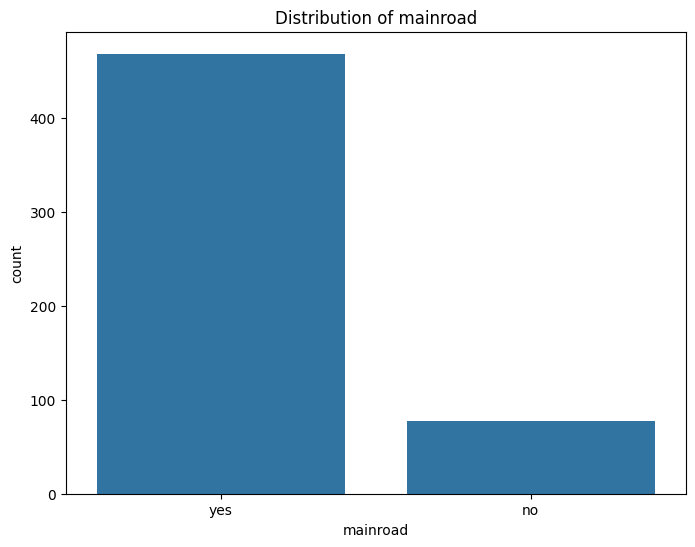

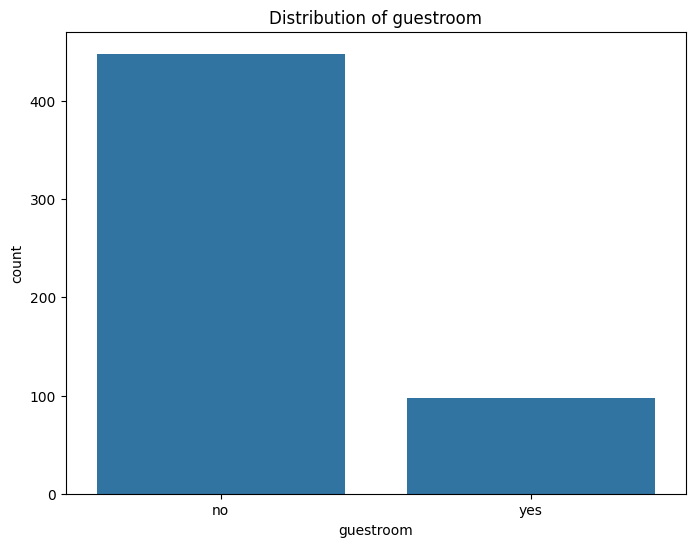

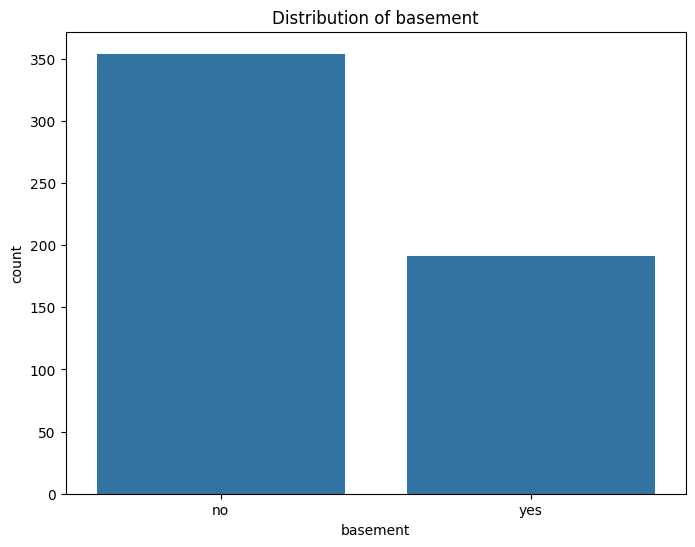

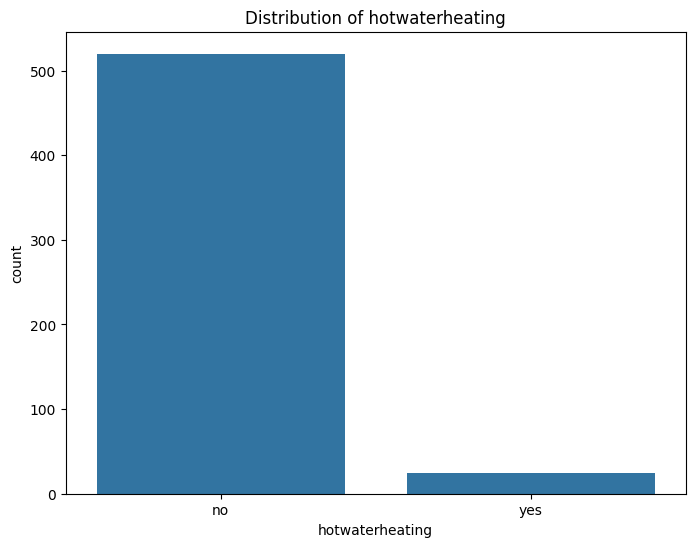

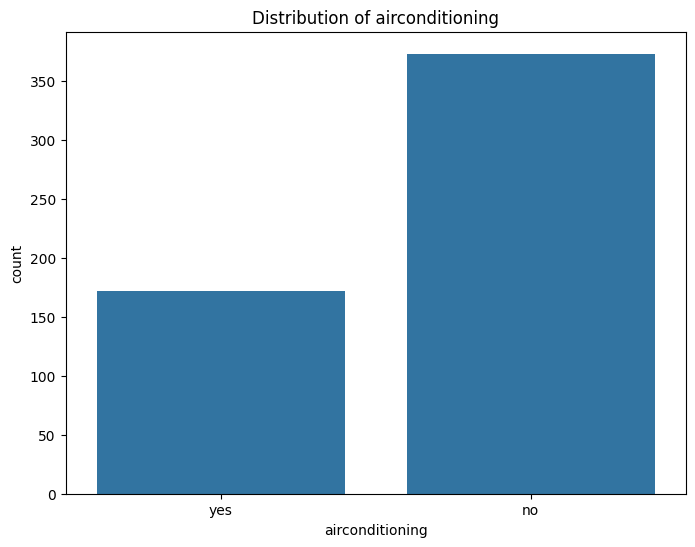

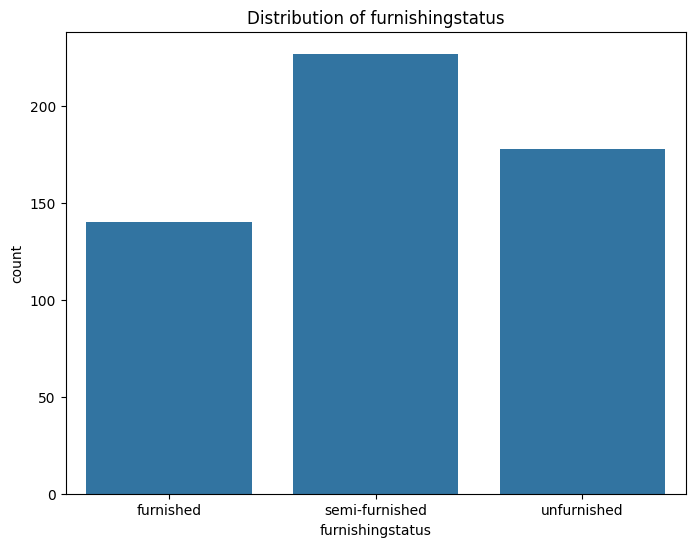

In [119]:
# Visualize distributions of categorical features
categorical_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'furnishingstatus']
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, data=df)
    plt.title(f'Distribution of {feature}')
    plt.show()

In [120]:
# Handle missing values (if any - based on previous step's output, there are none in this dataset, but including for completeness)
# If there were missing values, common strategies include:
# - Imputation with mean, median, or mode: df.fillna(df.mean(), inplace=True)
# - Dropping rows or columns with missing values: df.dropna(inplace=True)
print("No missing values found in the dataset.")

No missing values found in the dataset.


Original DataFrame shape: (545, 13)
DataFrame shape after outlier removal: (472, 13)




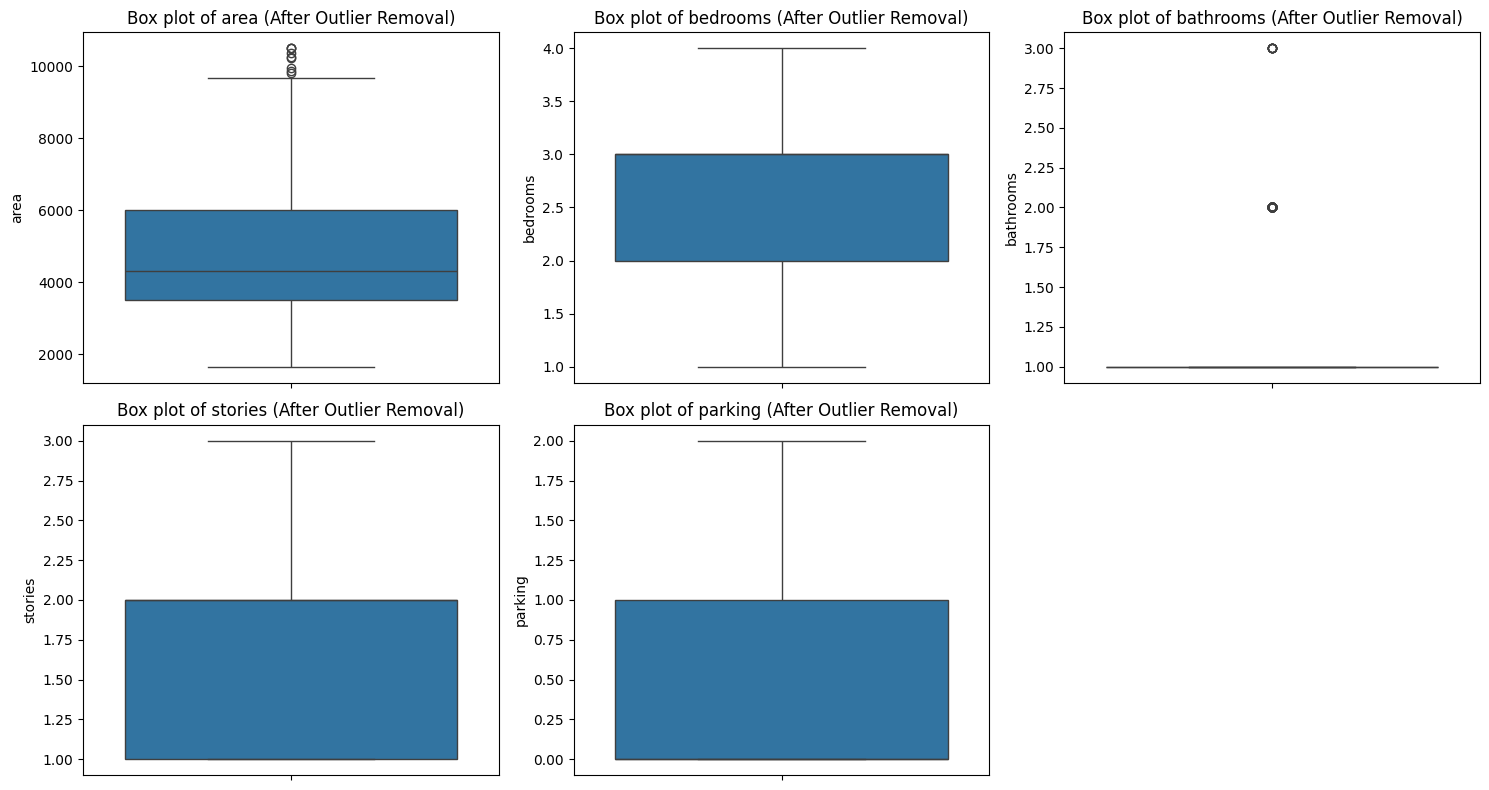

In [121]:
# Function to remove outliers using the IQR method
def remove_outliers_iqr(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Remove outliers from the numerical features
df_no_outliers = remove_outliers_iqr(df, numerical_features)

print(f"Original DataFrame shape: {df.shape}")
print(f"DataFrame shape after outlier removal: {df_no_outliers.shape}")
print("\n")

# Plot box plots to visualize outliers after removal
plt.figure(figsize=(15, 8))
for i, column in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df_no_outliers[column])
    plt.title(f'Box plot of {column} (After Outlier Removal)')
plt.tight_layout()
plt.show()

In [122]:
# Identify categorical features, including 'prefarea'
categorical_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'furnishingstatus', 'prefarea']

# Encode categorical features
df_processed = pd.get_dummies(df_no_outliers, columns=categorical_features, drop_first=True, dtype=int)

# The boolean-to-integer conversion loop is kept for robustness, but `dtype=int` in get_dummies
# makes it redundant for the columns it processes.
for col in df_processed.columns:
    if df_processed[col].dtype == 'bool':
        df_processed[col] = df_processed[col].astype(int)

display(df_processed.head())

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,prefarea_yes
0,13300000,7420,4,2,3,2,1,0,0,0,1,0,0,1
2,12250000,9960,3,2,2,2,1,0,1,0,0,1,0,1
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,0,0
5,10850000,7500,3,3,1,2,1,0,1,0,1,1,0,1
8,9870000,8100,4,1,2,2,1,1,1,0,1,0,0,1


In [123]:
# Define features (X) and target (y)
X = df_processed.drop('price', axis=1)
y = df_processed['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [124]:
# --- Model Training, Prediction, and Evaluation ---
print("--- Model Training, Prediction, and Evaluation ---")
print("\n")

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

--- Model Training, Prediction, and Evaluation ---




LinearRegression()

In [125]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate regression evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.4f}")
print("\n")

Mean Absolute Error (MAE): 780357.73
Mean Squared Error (MSE): 1344724490932.78
Root Mean Squared Error (RMSE): 1159622.56
R-squared (R2): 0.6349




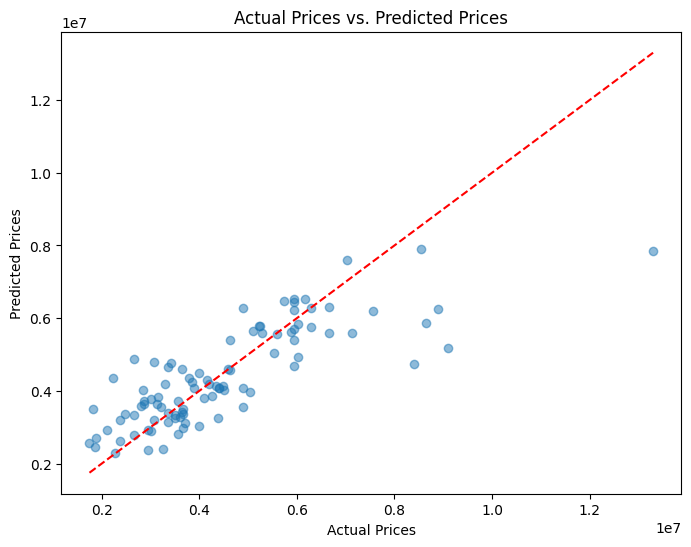

In [138]:
  # Visualize the predictions vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()

In [128]:
# --- Checking Linear Regression Assumptions ---
print("--- Checking Linear Regression Assumptions ---")
print("\n")

# To check the assumptions, we use the residuals (the difference between the
# actual and predicted values). We'll use the training data for this.
y_pred_train = model.predict(X_train)
residuals = y_train - y_pred_train

--- Checking Linear Regression Assumptions ---




1. Linearity & Homoscedasticity Check (Residuals Plot)
-------------------------------------------------------


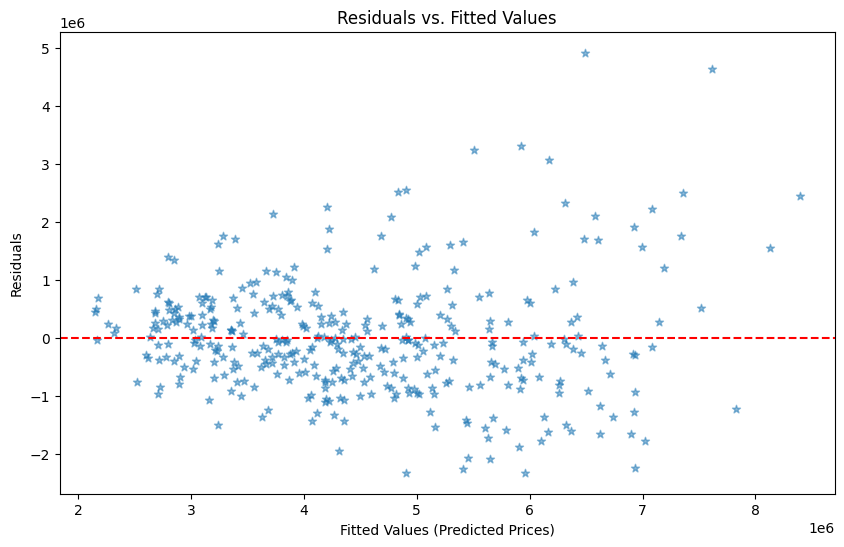

In [129]:
# 1. Linearity & Homoscedasticity Check (Residuals Plot)
# For linearity, points should be randomly scattered around the horizontal line at y=0.
# For homoscedasticity, the spread of the residuals should be constant and not form a cone shape.
print("1. Linearity & Homoscedasticity Check (Residuals Plot)")
print("-------------------------------------------------------")
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_train, residuals, alpha=0.5, marker='*')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Fitted Values (Predicted Prices)")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted Values")
plt.show()

In [130]:
# 2. Independence of Residuals (Durbin-Watson Test)
# The Durbin-Watson test checks for autocorrelation in the residuals.
# A value close to 2 indicates no autocorrelation. Values < 1 or > 3 are often a concern.

import statsmodels.api as sm

print("2. Independence of Residuals (Durbin-Watson Test)")
print("-------------------------------------------------")
sm_model = sm.OLS(y_train, sm.add_constant(X_train)).fit()
durbin_watson_stat = sm.stats.stattools.durbin_watson(sm_model.resid)
print(f"Durbin-Watson statistic: {durbin_watson_stat:.4f}")
print("\n")

2. Independence of Residuals (Durbin-Watson Test)
-------------------------------------------------
Durbin-Watson statistic: 2.0803




3. Normality of Residuals
-------------------------


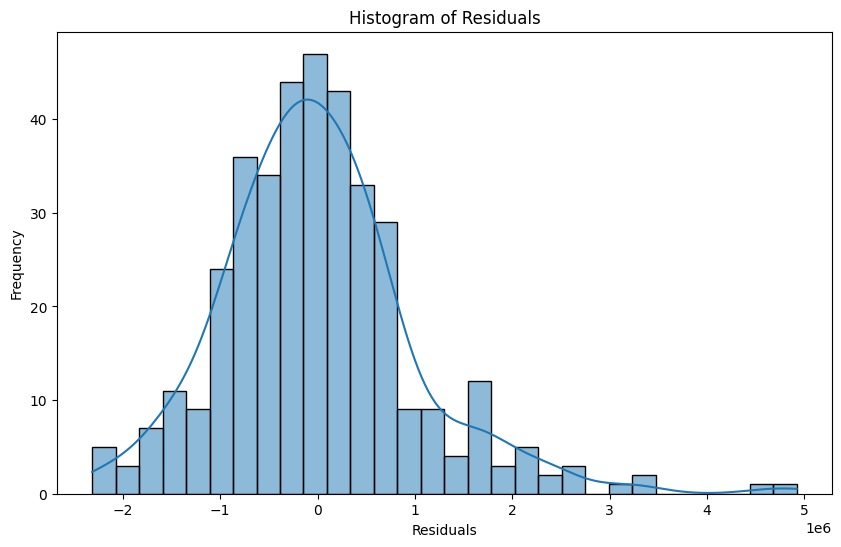

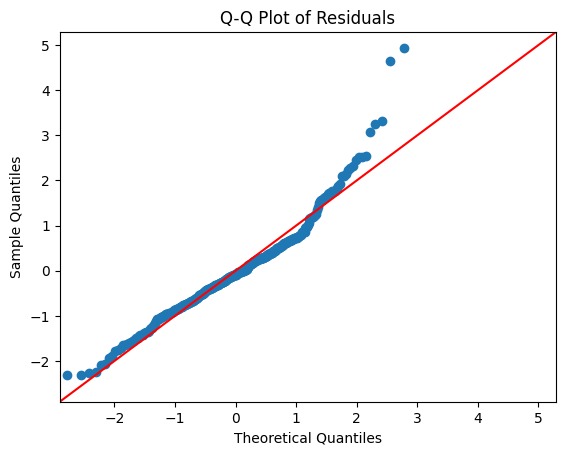

In [131]:
# 3. Normality of Residuals
# We check this using a Q-Q plot and a histogram of the residuals.
# For normality, the points on the Q-Q plot should fall on a straight line.
# The histogram should look approximately bell-shaped.
print("3. Normality of Residuals")
print("-------------------------")
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()

sm.qqplot(residuals, line='45', fit=True)
plt.title("Q-Q Plot of Residuals")
plt.show()
print("\n")

In [132]:
# 4. Homoscedasticity: The variance of the residuals is constant.
# As noted above, this is primarily checked with the Residuals vs. Fitted Values plot.
print("4. Homoscedasticity Check (see Residuals Plot above)")
print("-----------------------------------------------------")
print("The residuals plot is used to check for this assumption. A random scatter of points with no discernible pattern indicates homoscedasticity.")
print("\n")

4. Homoscedasticity Check (see Residuals Plot above)
-----------------------------------------------------
The residuals plot is used to check for this assumption. A random scatter of points with no discernible pattern indicates homoscedasticity.




5. Multicollinearity Check (Variance Inflation Factor - VIF)
--------------------------------------------------------------
                            feature        VIF
0                             const  39.729245
1                              area   1.409412
2                          bedrooms   1.507046
3                         bathrooms   1.224254
4                           stories   1.451463
5                           parking   1.195394
6                      mainroad_yes   1.157883
7                     guestroom_yes   1.292553
8                      basement_yes   1.339803
9               hotwaterheating_yes   1.062748
10              airconditioning_yes   1.148191
11  furnishingstatus_semi-furnished   1.721442
12     furnishingstatus_unfurnished   1.781123
13                     prefarea_yes   1.156189


5. Multicollinearity Check (Correlation Heatmap)
------------------------------------------------


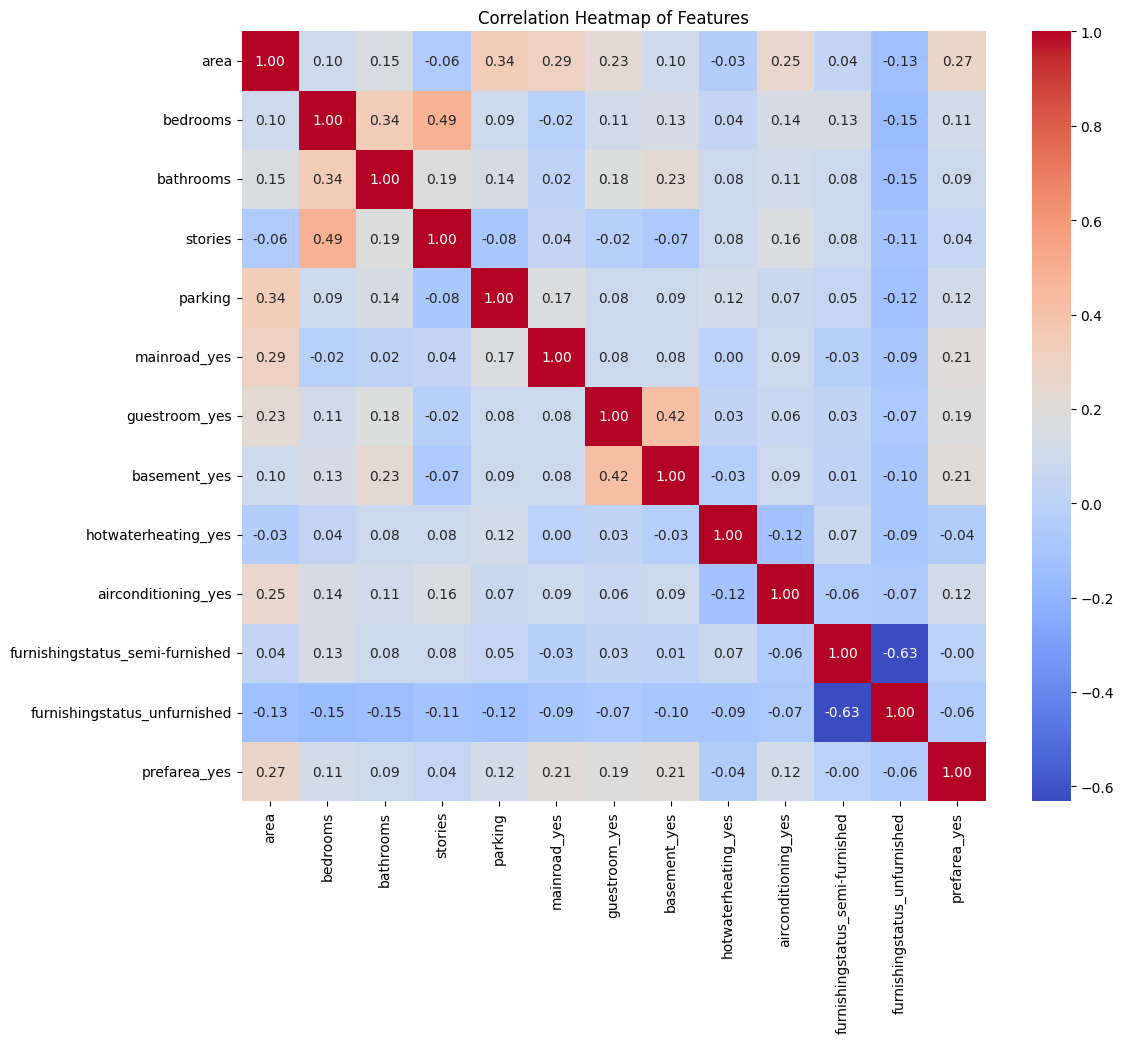

In [133]:
# 5. No Multicollinearity: Independent variables are not highly correlated.
# We use the Variance Inflation Factor (VIF) to detect this.
# VIF > 5 or VIF > 10 is often considered a red flag.

from statsmodels.stats.outliers_influence import variance_inflation_factor

print("5. Multicollinearity Check (Variance Inflation Factor - VIF)")
print("--------------------------------------------------------------")
X_vif = sm.add_constant(X_train)
vif_data = pd.DataFrame()
vif_data["feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(len(X_vif.columns))]
print(vif_data)
print("\n")

print("5. Multicollinearity Check (Correlation Heatmap)")
print("------------------------------------------------")
plt.figure(figsize=(12, 10))
correlation_matrix = X_train.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Features")
plt.show()
print("\n")